<a href="https://colab.research.google.com/github/musaraf786/Data-Science-Practice/blob/main/Project_Dominant_Color_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from sklearn.cluster import KMeans
import numpy as np

In [44]:
img = cv2.imread("Landscape.jpeg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(224,163))

print(img.shape)

(163, 224, 3)


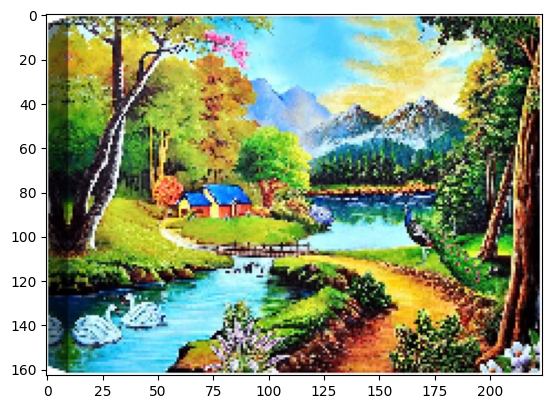

In [45]:
plt.imshow(img)
plt.show()

In [46]:
X = img.reshape((-1,3))

print(X.shape)


(36512, 3)


In [65]:
k = 5

model = KMeans(n_clusters=k)
model.fit(X)

KMeans(n_clusters=5)

In [66]:
centroids = model.cluster_centers_

In [67]:
print(centroids)

[[ 30.00409449  32.78929134  23.4167979 ]
 [214.43765029 234.9385091  219.78924768]
 [ 88.9706395  112.91433168  65.65866738]
 [113.55633168 205.43623254 235.30126183]
 [194.43062149 184.14889944  74.13260682]]


In [68]:
colors = np.array(centroids,dtype='uint8')

In [69]:
print(colors)

[[ 30  32  23]
 [214 234 219]
 [ 88 112  65]
 [113 205 235]
 [194 184  74]]


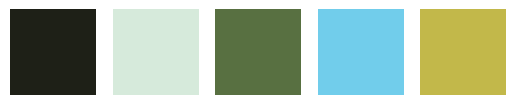

In [70]:
#Color Patch (100,100,3) -> R G B color

i=1

for color in colors:
  plt.subplot(1,k,i)
  i = i+1
  plt.axis("off")
  mat = np.zeros((100,100,3),dtype='uint8')
  mat[:,:,:] = color
  plt.imshow(mat)

plt.show()


In [71]:
# Basic Segmentation based upon similar color regions
# Segmentation partitions as image into regions
# having similar visual appearance corresponding to parts of objects

print(colors)


[[ 30  32  23]
 [214 234 219]
 [ 88 112  65]
 [113 205 235]
 [194 184  74]]


In [72]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [73]:
model.labels_.shape

(36512,)

In [74]:
newImg = np.zeros((X.shape),dtype='uint8')
print(newImg.shape)

(36512, 3)


In [75]:
for i in range(newImg.shape[0]):
  newImg[i] = colors[model.labels_[i]]

In [76]:
newImg = newImg.reshape(img.shape)

In [77]:
print(newImg.shape)

(163, 224, 3)


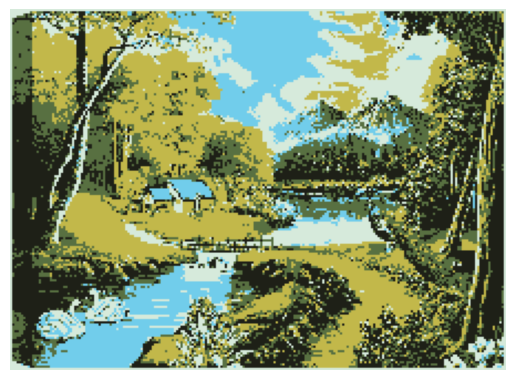

In [78]:
plt.imshow(newImg)
plt.axis("off")
plt.show()